In [2]:
#Importing the Dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol

All the input variable are continuous data

Output variable (based on sensory data): 12 - quality (score between 0 and 10) -- Discrete Data

The dataset contains 1599 rows and 12 columns including target variable quality.


# EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
#Descriptive Statistics

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


From above, we can see that max value is far from the mean value for residual sugar, free sulfur dioxide , total sulfur dioxide, sulphates and alcohol. Outlier is present in the dataset. We need to remove the outliers

In [7]:
#Checking the null values

df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<AxesSubplot:>

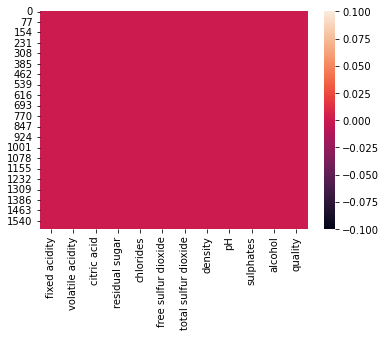

In [8]:
#Checking the null values through heatmap
sns.heatmap(df.isnull())

From above, we can see there is no null values present in our dataset.

# Data Visualisation

In [9]:
## Checking the uniqueness of dataset
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Unique occurence of the target variable 'quality' ranges from 3 to 8

In [10]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

From above we can see that it is not a balanced data. We need to balance it later

Bivariate analysis of the data

<AxesSubplot:xlabel='fixed acidity', ylabel='quality'>

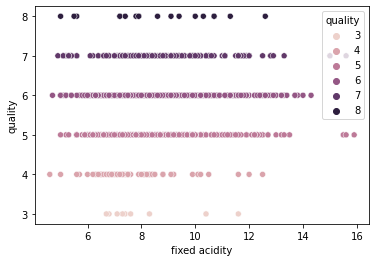

In [11]:
#Scatter plot  

sns.scatterplot(data=df, x="fixed acidity", y="quality", hue="quality")

Wine quality increases with increase in fixed acidity.

<AxesSubplot:xlabel='volatile acidity', ylabel='quality'>

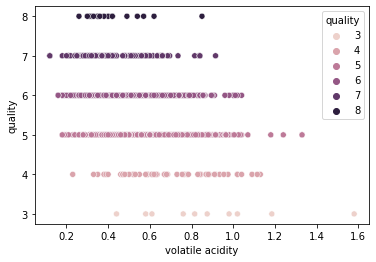

In [12]:
sns.scatterplot(data=df, x="volatile acidity", y="quality", hue="quality")

Increasing volatile acidity, decreases the wine quality.

<AxesSubplot:xlabel='citric acid', ylabel='quality'>

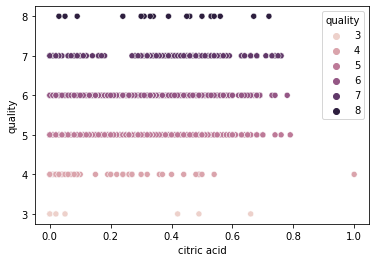

In [13]:
sns.scatterplot(data=df, x="citric acid", y="quality", hue="quality")

Wine quality increases with increase in citric acid

<AxesSubplot:xlabel='residual sugar', ylabel='quality'>

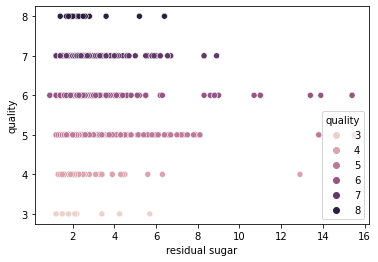

In [14]:
sns.scatterplot(data=df, x="residual sugar", y="quality", hue="quality")

Wine quality degreded with increase in residual sugar.

<AxesSubplot:xlabel='chlorides', ylabel='quality'>

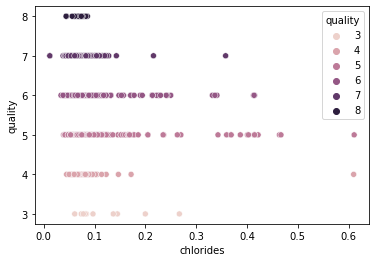

In [15]:
sns.scatterplot(data=df, x="chlorides", y="quality", hue="quality")

Wine quality degreded with increase in chlorides level.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='quality'>

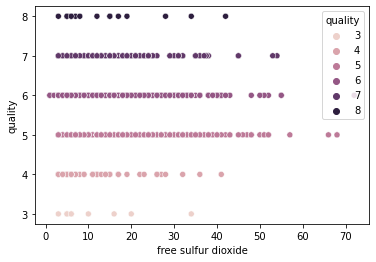

In [16]:
sns.scatterplot(data=df, x="free sulfur dioxide", y="quality", hue="quality")

Higher sulfer dioxide level, wine quality degreded.

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='quality'>

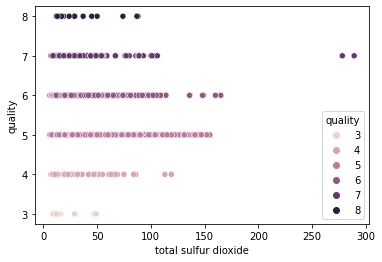

In [17]:
sns.scatterplot(data=df, x="total sulfur dioxide", y="quality", hue="quality")

Total sulfer dioxide upto 150, wine quality 6 is achieved. Lesser the sulfer dioxide, wine quality is good.

<AxesSubplot:xlabel='density', ylabel='quality'>

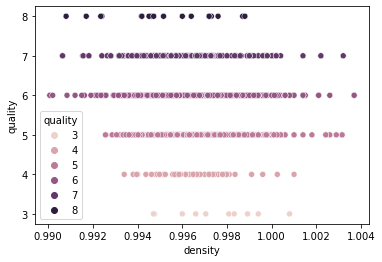

In [18]:
sns.scatterplot(data=df, x="density", y="quality", hue="quality")

Density between 0.994 to 1.0, wine quality increase.

<AxesSubplot:xlabel='pH', ylabel='quality'>

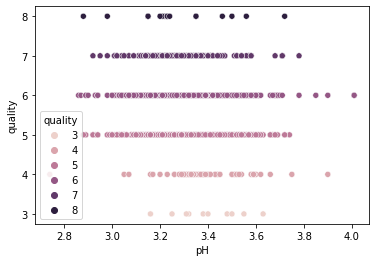

In [19]:
sns.scatterplot(data=df, x="pH", y="quality", hue="quality")

Wine quality increase with increase in pH lavel

<AxesSubplot:xlabel='alcohol', ylabel='quality'>

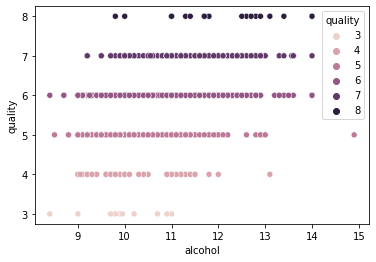

In [20]:
sns.scatterplot(data=df, x="alcohol", y="quality", hue="quality")

As the alcohol content increase, wine quality also increases

Multivariate Analysis

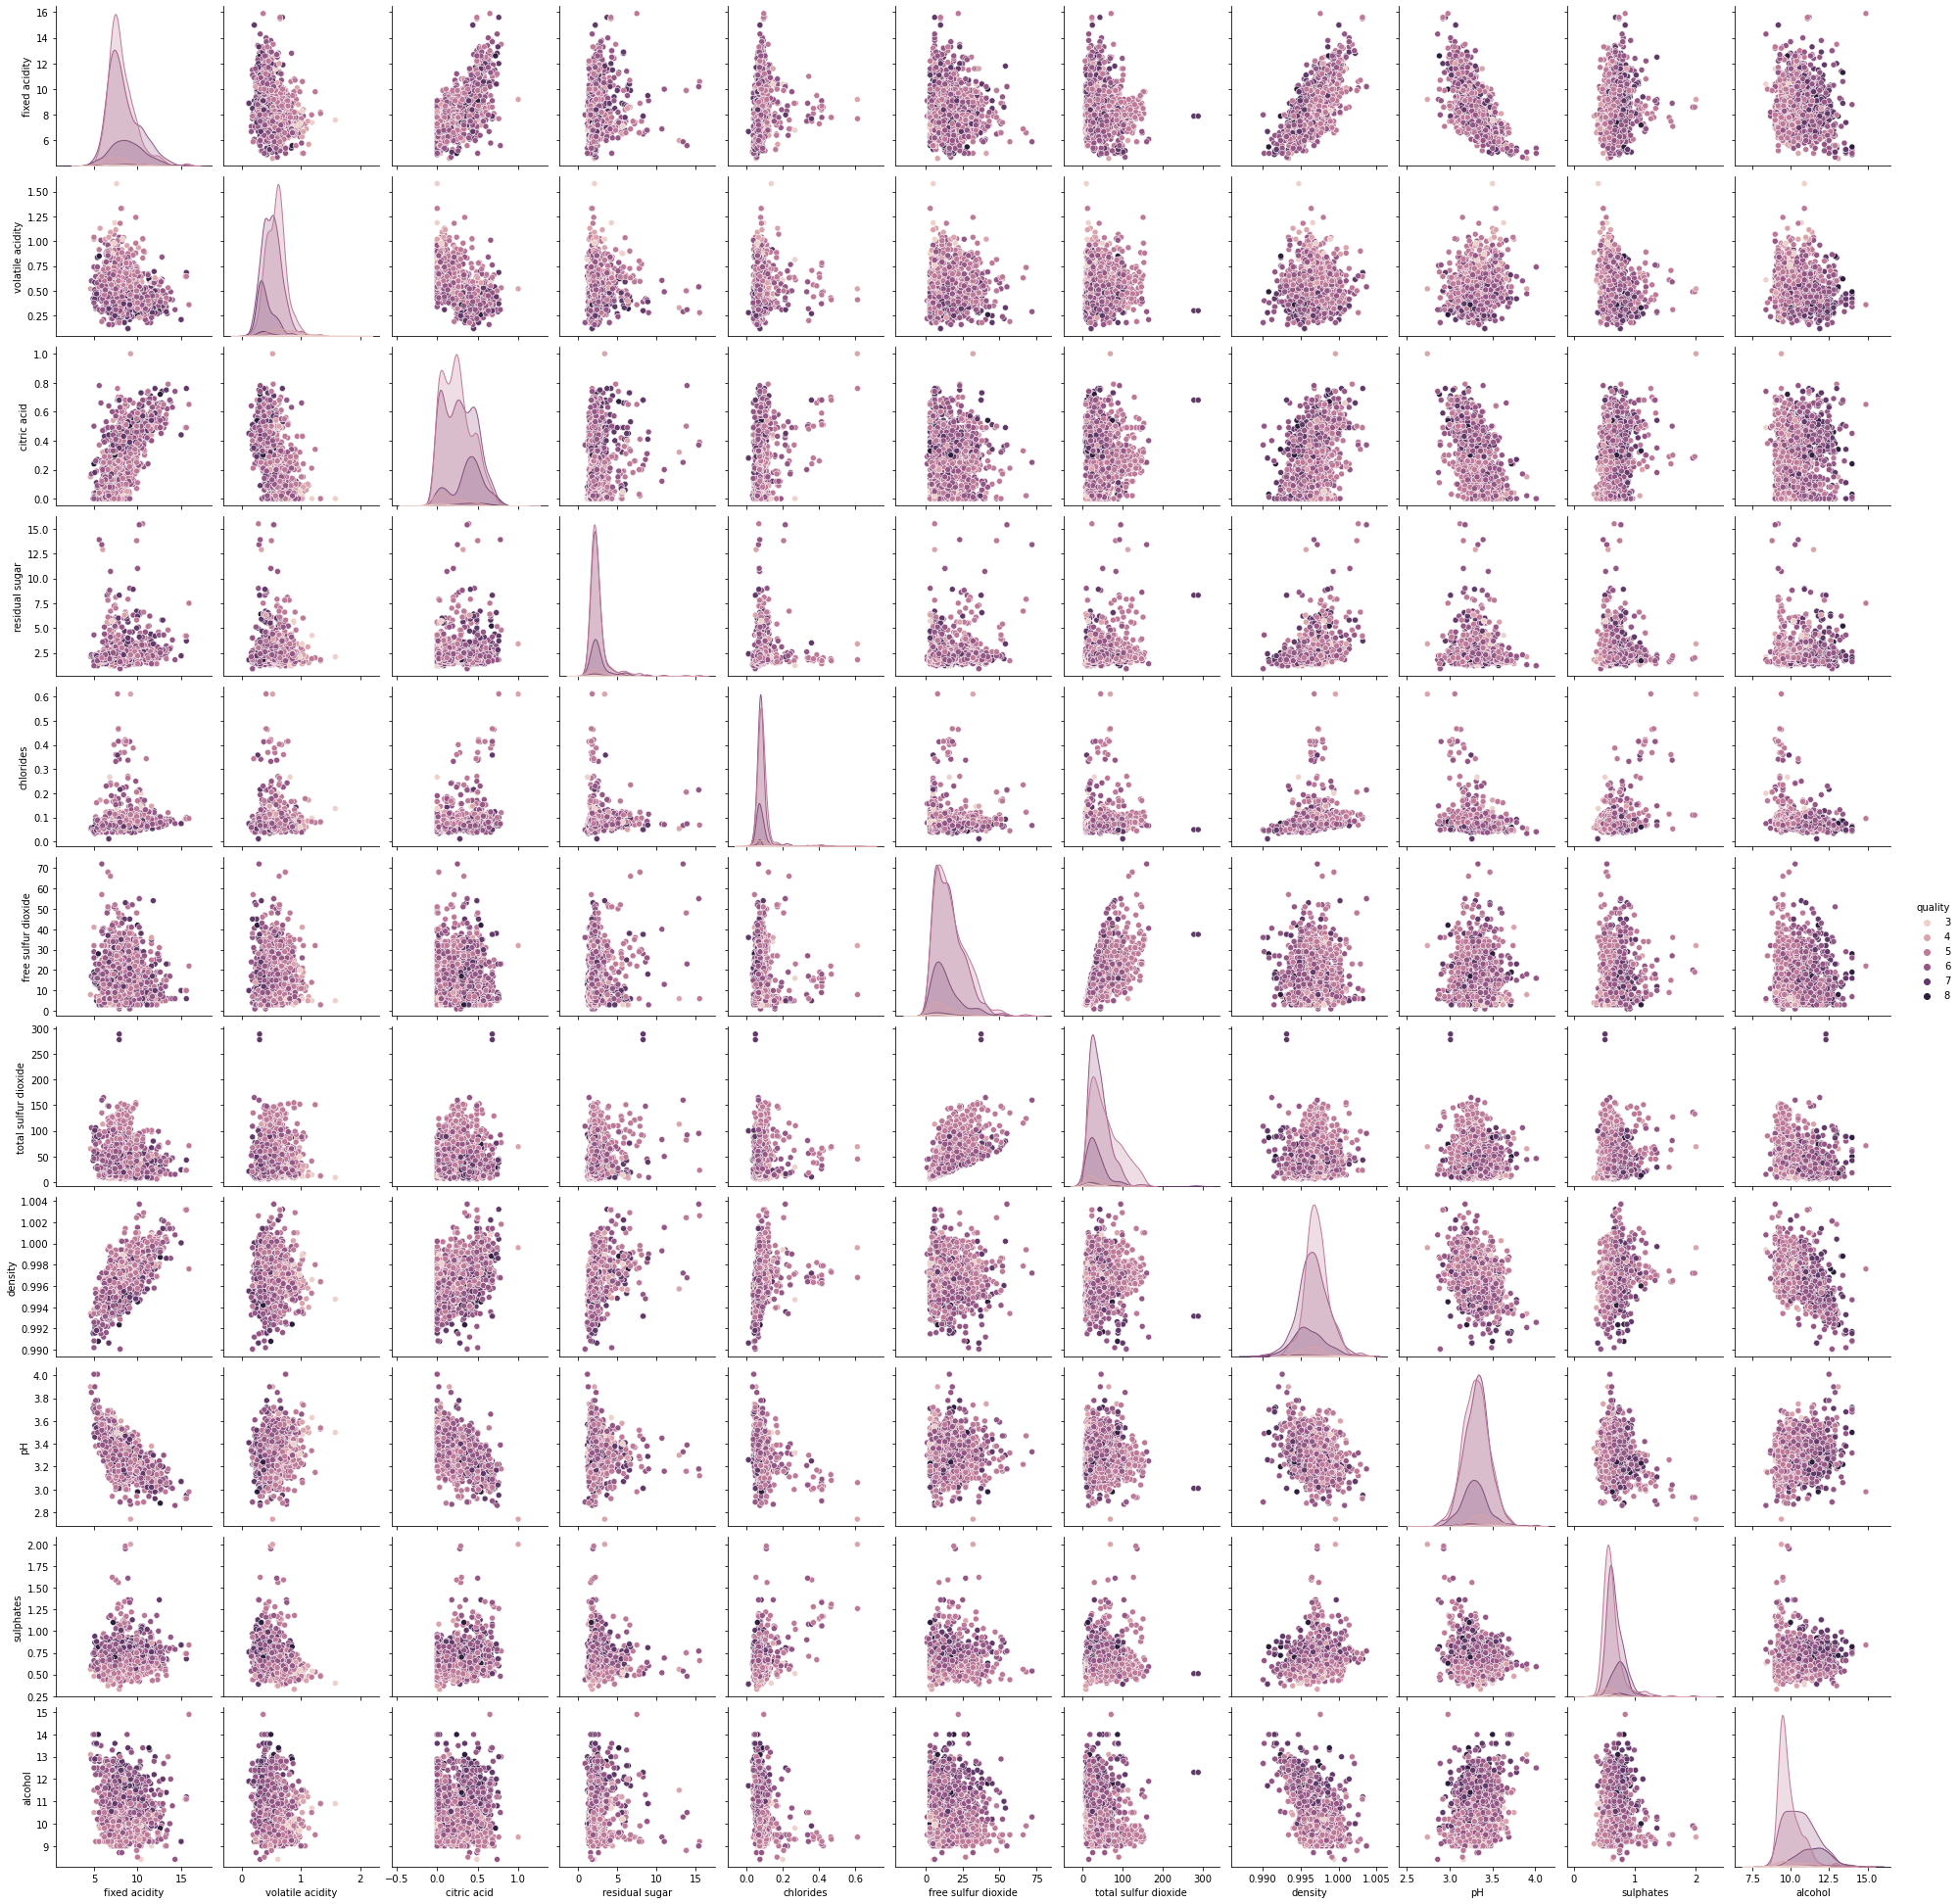

In [21]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="quality")

Checking the Corelation

In [22]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


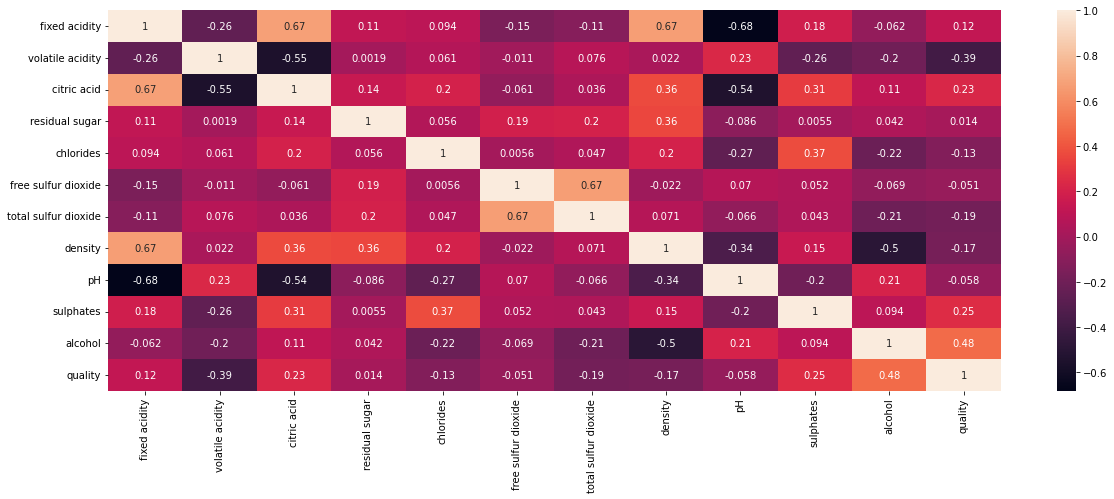

In [23]:
# Plotting the heatmap to visualise and find the coefficient of multicollinearity
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

As we can see alchol,sulphates, citric acid, fixed acidity are positively correlated with target variable. Volatile acidity, chlorides, free sulfer dioxide, total sulfer dioxide, density and pH are negatively correlated. Total sulfer dioxide and free sulfer dioxide highly corelated to each other.

# Outliers

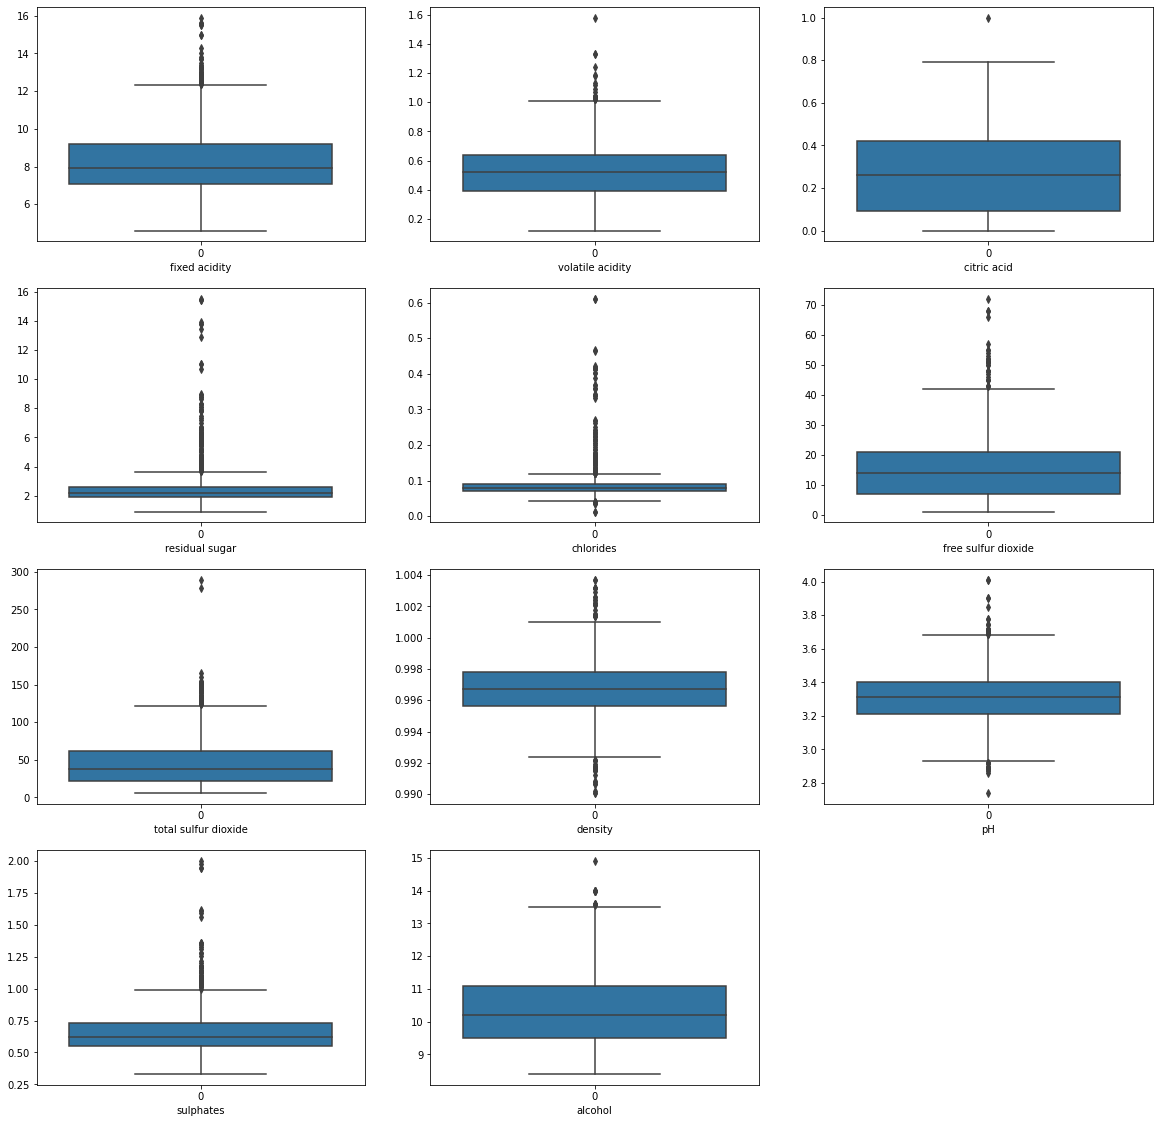

In [24]:
# now check the outliers present in our data using box plot
plt.figure(figsize=(20,25))
graph=1
for c in df:
    if graph<=11:
        plt.subplot(5,3,graph)
        sns.boxplot(data=df[c])
        plt.xlabel(c)
    graph+=1    
plt.show()

From above imgae, we can see outliers present on all features. We will remove Outliers throiugh zscore

In [25]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
Data=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]

In [27]:
# Using zscore to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(Data))

z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
1,0.298547,1.967442,1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,0.719933,0.128950,0.584777
2,0.298547,1.297065,1.186070,0.169427,0.096353,0.083669,0.229047,0.134264,0.331177,0.048089,0.584777
3,1.654856,1.384443,1.484154,0.453218,0.264960,0.107592,0.411500,0.664277,0.979104,0.461180,0.584777
4,0.528360,0.961877,1.391472,0.453218,0.243707,0.466193,0.379133,0.558274,1.288643,0.579207,0.960246
...,...,...,...,...,...,...,...,...,...,...,...
1594,1.217796,0.403229,0.980669,0.382271,0.053845,1.542054,0.075043,0.978765,0.899886,0.461180,0.072294
1595,1.390155,0.123905,0.877968,0.240375,0.541259,2.211469,0.137820,0.862162,1.353436,0.601055,0.729364
1596,1.160343,0.099554,0.723916,0.169427,0.243707,1.255161,0.196679,0.533554,0.705508,0.542042,0.541630
1597,1.390155,0.654620,0.775267,0.382271,0.264960,1.542054,0.075043,0.676657,1.677400,0.305990,0.209308


In [28]:
z.shape

(1599, 11)

In [29]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 12)
(1458, 12)


In [30]:
Loss_percentage=(1599-1458)/1599*100
print(Loss_percentage)

8.818011257035648


In [31]:
wine_quality=[]
for i in df_new["quality"]:
    if i >=7:
        wine_quality.append(1)
    else:
        wine_quality.append(0)
df_new["quality"]=wine_quality

wine_quality 7 or higher getting classified as '1' and the remainder as '0'.

# Skewness

In [32]:
df_new.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

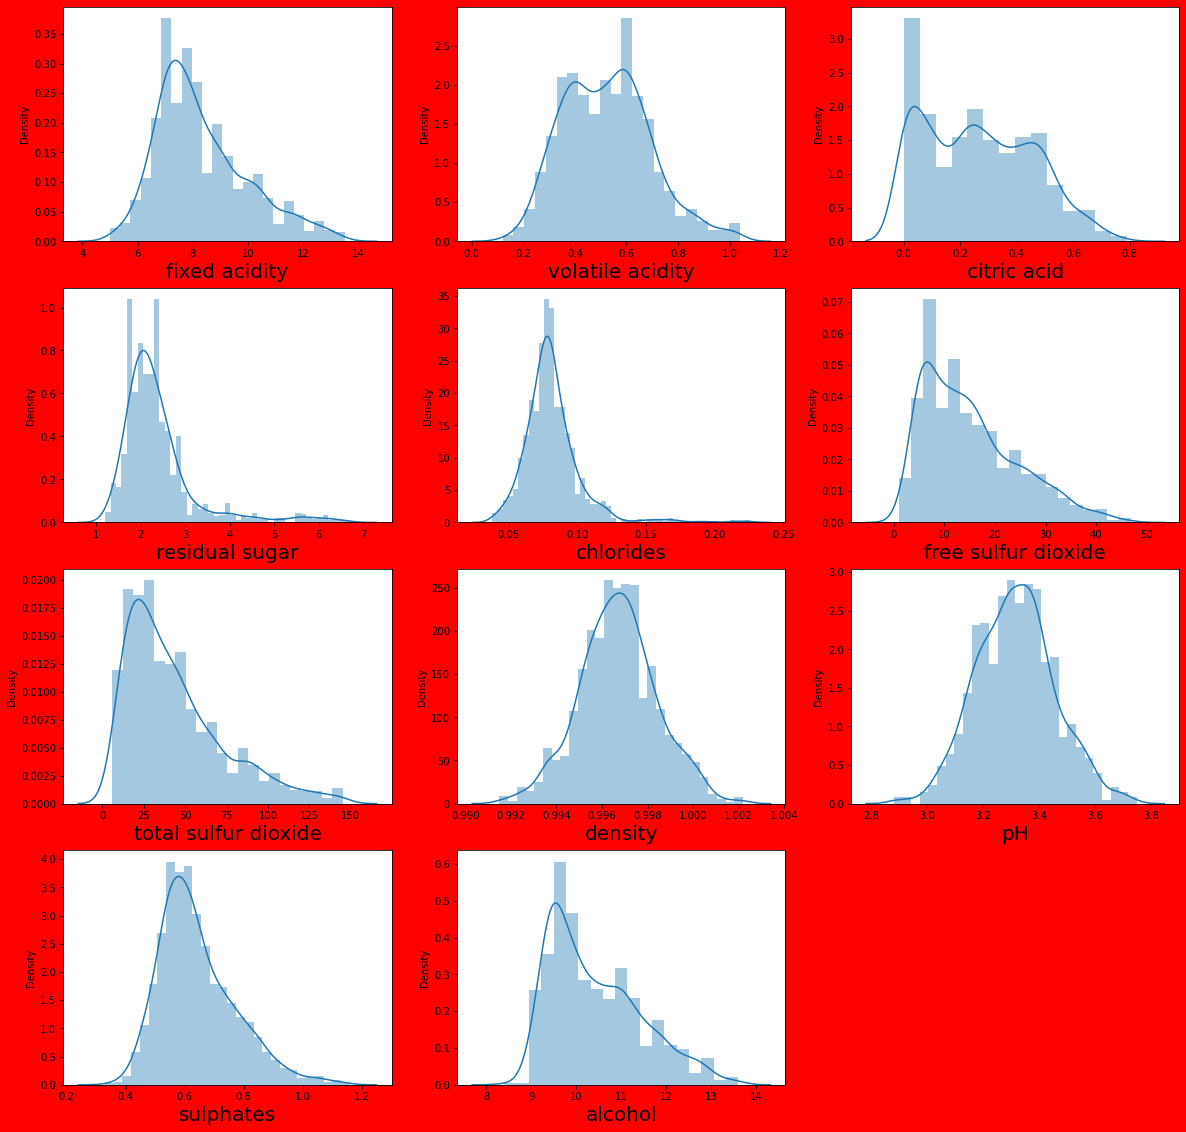

In [33]:
# now we will check skewness present in our data or not
plt.figure(figsize=(20,25),facecolor='r')
plno=1
for i in df_new:
    if plno<=11:
        ax=plt.subplot(5,3,plno)
        sns.distplot(df_new[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

from this figure we can find that skewness were present in our dataframe.

In [34]:
#Separating feature and label
x=df_new.drop(['quality'],axis=1)
y = df_new.iloc[:,-1]

Removing skewness through power transform

In [35]:
from sklearn.preprocessing import PowerTransformer
pw=PowerTransformer(method='yeo-johnson')
x_new=pw.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.skew()

fixed acidity           0.019079
volatile acidity        0.005289
citric acid             0.018652
residual sugar         -0.003351
chlorides              -0.115179
free sulfur dioxide    -0.021273
total sulfur dioxide   -0.005751
density                -0.000989
pH                     -0.000062
sulphates               0.021132
alcohol                 0.108436
dtype: float64

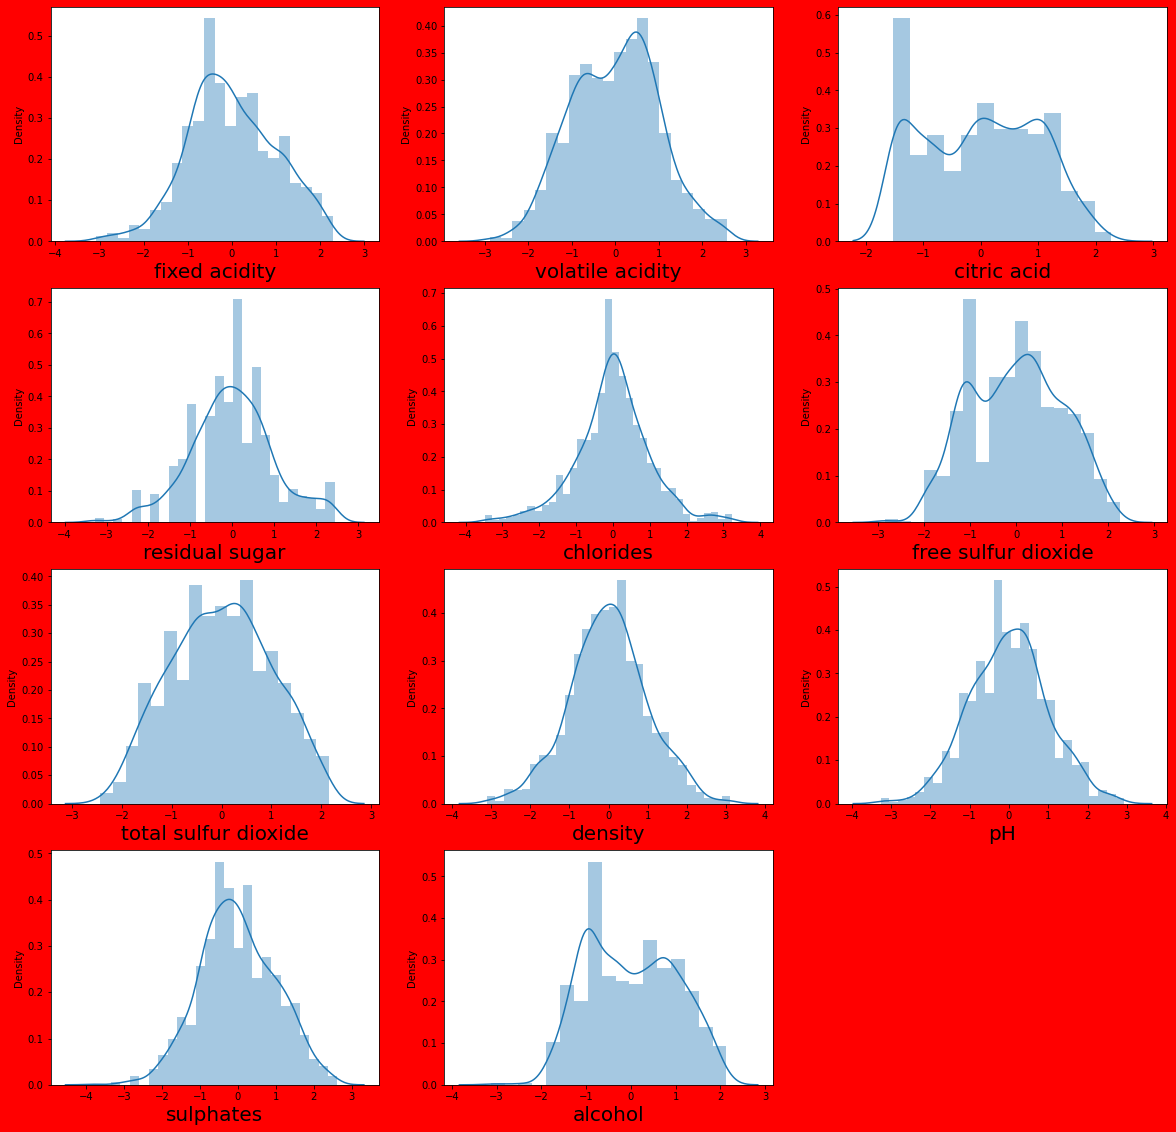

In [36]:
# Plotting normal distribution curve after removing skewness
plt.figure(figsize=(20,25),facecolor='r')
plno=1
for i in x_new:
    if plno<=11:
        ax=plt.subplot(5,3,plno)
        sns.distplot(x_new[i])
        plt.xlabel(i,fontsize=20)
    plno+=1
plt.show()

From above, we can see skewness is removed

# Oversampling

In [37]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_new, y = SM.fit_resample(x_new,y)

In [38]:
y.value_counts()

0    1257
1    1257
Name: quality, dtype: int64

Now the data is balanced and we can proceede further

# Standardization

In [39]:
#Now we will satndardize our data using standardscalar
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_scaled=pd.DataFrame(sc.fit_transform(x_new),columns=x_new.columns)
x_scaled

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.588006,1.362445,-1.777089,-0.684629,-0.015548,-0.137323,0.142937,0.748152,1.497816,-0.964858,-1.560142
1,-0.300870,2.216082,-1.777089,0.559751,1.081159,1.229192,1.198763,0.200951,-0.743121,0.106995,-0.972274
2,-0.300870,1.660440,-1.498619,0.123742,0.821752,0.355053,0.858693,0.310831,-0.295059,-0.131232,-0.972274
3,1.384845,-1.233350,1.180101,-0.684629,-0.075946,0.562047,1.024319,0.856935,-1.045878,-0.762494,-0.972274
4,-0.588006,1.362445,-1.777089,-0.684629,-0.015548,-0.137323,0.142937,0.748152,1.497816,-0.964858,-1.560142
...,...,...,...,...,...,...,...,...,...,...,...
2509,0.734560,-1.036426,0.430849,-2.138768,-0.652168,-1.649390,-1.997451,-0.853969,-0.745013,-0.994839,0.554901
2510,0.842713,-1.342810,0.950333,-0.140412,-0.032698,-1.011427,-0.620827,0.206161,-0.809104,2.136677,0.655093
2511,0.279262,-0.775705,0.655965,0.093222,1.129524,-1.011427,-1.546170,-0.614802,-0.921139,-0.627242,1.034407
2512,0.537423,-0.681380,0.744393,-0.049920,-0.344632,0.057392,-0.231550,-0.815693,0.088663,0.629659,1.259438


# Modelling

In [40]:
#Finding the best random state

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9258278145695364  on Random_state  117


From above, we can see best accuracy is 92.84% for random state 63

Splitting the data using this best random state and find the best model

In [41]:
#Creating train test split

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=63)

# Decision Tree Classifier

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)

print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.9019867549668874
[[315  41]
 [ 33 366]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89       356
           1       0.90      0.92      0.91       399

    accuracy                           0.90       755
   macro avg       0.90      0.90      0.90       755
weighted avg       0.90      0.90      0.90       755



Decision Tree accuracy score is 92%

We will import other model and check the accuracy score

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest Cassifier

In [44]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)

print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test,predrf))

0.9602649006622517
[[336  20]
 [ 10 389]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       356
           1       0.95      0.97      0.96       399

    accuracy                           0.96       755
   macro avg       0.96      0.96      0.96       755
weighted avg       0.96      0.96      0.96       755



Random forest accuracy score is 95%

# KNN Classifier

In [45]:
knn = KNN()
knn.fit(x_train,y_train)
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.909933774834437
[[292  64]
 [  4 395]]
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       356
           1       0.86      0.99      0.92       399

    accuracy                           0.91       755
   macro avg       0.92      0.91      0.91       755
weighted avg       0.92      0.91      0.91       755



KNN accuracy score is 91%

# Support Vector Machine Classifier

In [46]:
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.9205298013245033
[[324  32]
 [ 28 371]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92       356
           1       0.92      0.93      0.93       399

    accuracy                           0.92       755
   macro avg       0.92      0.92      0.92       755
weighted avg       0.92      0.92      0.92       755



SVC accuracy score is 92%

# Gradient Boosting Classifier

In [47]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb = gb.predict(x_test)

print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))

print(classification_report(y_test,predgb))

0.9152317880794701
[[319  37]
 [ 27 372]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91       356
           1       0.91      0.93      0.92       399

    accuracy                           0.92       755
   macro avg       0.92      0.91      0.91       755
weighted avg       0.92      0.92      0.92       755



Gradient Bosting accuracy score is 91%

# Cross Validation Score

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
cvs=cross_val_score(dt,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Decision Tree Algorithm=",cvs)

Cross Validation score for Decision Tree Algorithm= 0.8663374335659351


In [50]:
cvs=cross_val_score(rf,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Random Forest Classifier Algorithm=",cvs)

Cross Validation score for Random Forest Classifier Algorithm= 0.9180621450579391


In [51]:
cvs=cross_val_score(knn,x_scaled,y,cv=5).mean()
print ("Cross Validation score for KNearest Alogorithm=",cvs)

Cross Validation score for KNearest Alogorithm= 0.8551971042272264


In [52]:
cvs=cross_val_score(svc,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Support Vector Machine Classifier Algorithm=",cvs)

Cross Validation score for Support Vector Machine Classifier Algorithm= 0.8711191021203456


In [53]:
cvs=cross_val_score(gb,x_scaled,y,cv=5).mean()
print ("Cross Validation score for Gradient Boosting Algorithm=",cvs)

Cross Validation score for Gradient Boosting Algorithm= 0.872714311739127


From above, we can select Random forest classifier as the best model and we will use this model for further processing.

# Hyper parameter tuning

In [54]:
from sklearn.model_selection import GridSearchCV

In [56]:
parameters= {'n_estimators' : [20, 40, 60, 80, 100,120, 140,160, 200], 'criterion':['gini', 'entropy'], 'bootstrap':[0,1,0,1,0,1]}
model=RandomForestClassifier()
Grid= GridSearchCV(estimator=model, param_grid= parameters)
Grid.fit(x_train, y_train)


print(Grid)
print(Grid.best_score_)

print(Grid.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [0, 1, 0, 1, 0, 1],
                         'criterion': ['gini', 'entropy'],
                         'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160,
                                          200]})
0.9442760942760943
{'bootstrap': 0, 'criterion': 'gini', 'n_estimators': 200}


In [57]:
p=Grid.predict(x_test)

print (accuracy_score(y_test,p))
print (confusion_matrix(y_test,p))
print (classification_report(y_test,p))
print('\n')

0.9549668874172186
[[334  22]
 [ 12 387]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       356
           1       0.95      0.97      0.96       399

    accuracy                           0.95       755
   macro avg       0.96      0.95      0.95       755
weighted avg       0.96      0.95      0.95       755





Model accuracy increase from 95% to 96% after tuning

ROC AUC curve for evaluation of our model

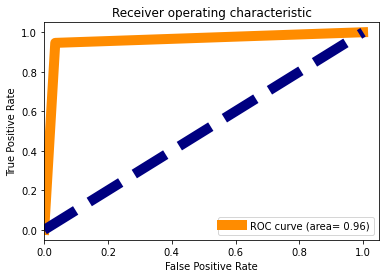

In [58]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(p, y_test)
roc_auc= auc(fpr, tpr)

plt.figure()
plt.plot(fpr,tpr, color='darkorange', lw=10,label='ROC curve (area= %0.2f)' %roc_auc)
plt.plot([0,1],[0,1],color ='navy', lw=10, linestyle= '--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Saving the model

In [59]:
import pickle
filename='Red_Wine_Quality_Prediction.pkl'
pickle.dump(rf,open(filename,'wb'))